<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/3-More_Markov_Chains/More_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#More Markov Chains

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-absorbing.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

## Summary

### Part 1

You roll a fair six-sided die 6 times. Whatever the results, you paint those on the sides of a blank die. So, if your rolls were 4, 5, 2, 6, 1, 1, then your new die has no 3’s and two 1’s. Then, you repeat the process with your new die — roll it 6 times and paint the results on a blank die. Eventually, you’ll roll the same number 6 times, at which point the process stops. Let $T$ = the number of rounds (of 6 rolls each) that you perform until stopping. (If your 6 rolls in the first round all result in the same number, then you stop with $T=1$.)

### Part 2

In this part you will create and solve your own problems involving Markov chains. You have lots of flexibility, but your problems should include at least one part that requires:
- A simulation
- An analytical solution that uses either first step analysis/absorption
- An analtyical solution that uses stationary distributions/long run behavior

---

## Application - Part 1

###1.

Code and run a simulation to approximate the distribution of $T$ and its expected value, without using Markov chains. Summarize the approximate distribution in an appropriate plot, and describe the distribution in 2-3 sentences (e.g., compute and interpret a few percentiles).

In [ ]:
import numpy as np
import pandas as pd

def die_sim():
  # create containers for dice
  fresh_die = [1, 2, 3, 4, 5, 6]
  current_die = fresh_die
  new_die = fresh_die

  #create flag for loop and variables
  same = False
  rolls = 6 # rolls corisponding to sides of dice
  T = 0 # number of dice created before all sides are the same

  while(not same):
    #show current die
    #print(current_die, "\n")

    # roll current die and create new die
    # for i in range(0,rolls):
    #   result = np.random.choice(current_die)
    #   new_die[i] = result

    new_die = [np.random.choice(current_die) for i in range(rolls)]

    #increment die counter, check die side similarity
    T += 1
    current_die = new_die
    same = all(x == new_die[0] for x in new_die)

  #print(current_die, "\n", T)
  return T

In [ ]:
# run simulation multiple times
sims = 10000

sim_results = np.empty(sims)

for i in range(0,sims):
  sim_results[i] = die_sim()

(array([8.44615385e-02, 6.20769231e-02, 2.71538462e-02, 1.07884615e-02,
        4.61538462e-03, 2.38461538e-03, 4.80769231e-04, 1.73076923e-04,
        1.34615385e-04, 3.84615385e-05]),
 array([ 2. ,  7.2, 12.4, 17.6, 22.8, 28. , 33.2, 38.4, 43.6, 48.8, 54. ]),
 <BarContainer object of 10 artists>)

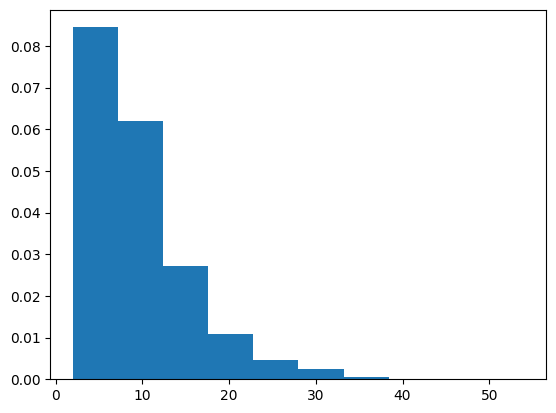

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sim_results, density = True)

In [ ]:
# compute expected value
ev = sim_results.mean()
std_dev = sim_results.std()
print("The average of dice created until the final with all the same sides is {:.2f} dice".format(ev))
print("The standard deviation was {:.2f} dice".format(std_dev))

The average of dice created until the final with all the same sides is 9.72 dice
The standard deviation was 5.86 dice


The distribution seems to be right skewed, with the bulk of the required rolls hovering around 5-10. The expected value of the distribution is about 9.72 rolls.

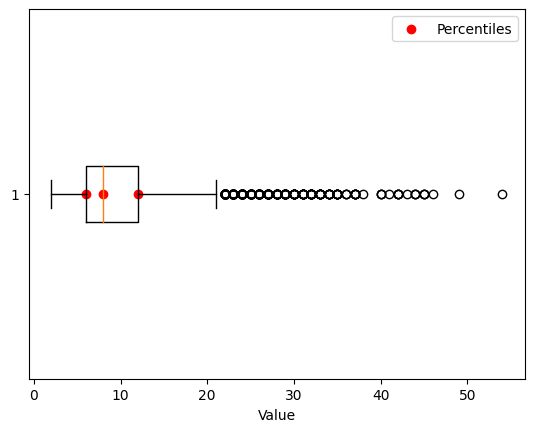

In [ ]:
# calculate percentiles
percentiles = np.percentile(sim_results, [25, 50, 75])

# create a box plot with percentiles
plt.boxplot(sim_results, vert=False)
plt.scatter(percentiles, [1, 1, 1], color='red', marker='o', label='Percentiles')
plt.xlabel('Value')
plt.legend()
plt.show()

In [ ]:
print("The percentiles are :",percentiles)

The percentiles are : [ 6.  8. 12.]


###2.

Define a Markov chain that will help you find $E(T)$. Be sure to clearly define the state space. (Note: there are several ways to do this; any one is fine just be clear in your choice.)

This Markov chain will follow the guidance from Dr.Ross as specified in the class discord. The states of the Markov chain will be a tuple containing the amount of times a face showes up on a die.

The starting die will look like:
$$
\{
\begin{array}
 & 1 & 1 & 1 & 1 & 1 & 1
\end{array}
\}
$$

The final array will take 1 of 6 forms where one index will hold 6 and the rest are zero:
$$
\{
\begin{array}
 & 0 & 6 & 0 & 0 & 0 & 0
\end{array}
\}
$$

or

$$
\{
\begin{array}
 & 0 & 0 & 0 & 0 & 0 & 6
\end{array}
\}
$$

Notice that every time, the contents of the array will always add up to 6. Due to that, we should only expect 462 states total. With this definition of the states, The transition probabilities become the multinomial probabilities.

p((x1, x2, x3, x4, x5, x6), ((y1, y2, y3, y4, y5, y6)) = dmultinom(c(y1, y2, y3, y4, y5, y6), prob = c(x1, x2, x3, x4, x5, x6))

###3.

Determine the transition matrix for your Markov chain. You might want to compute a few of the transition probabilities by hand, but you’ll probably need to write code to fill in the whole matrix.

In [4]:
#Switch to R runtime to use this cell
n = 6

x = expand.grid(replicate(n, 0:n, simplify = FALSE))
x = as.matrix(x)
x = x[rowSums(x) == n, ]

n_states = nrow(x)

P = matrix(rep(NA, n_states * n_states), nrow = n_states)

for (i in 1:n_states) {
  for (j in 1:n_states) {
    P[i, j] = dmultinom(x[j, ], prob = x[i, ])
  }
}

In [5]:
P

1.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
3.348980e-01,0.4018775720,0.2009387860,0.0535836763,0.0080375514,0.0006430041,2.143347e-05,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
8.779150e-02,0.2633744856,0.3292181070,0.2194787380,0.0823045267,0.0164609053,1.371742e-03,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
1.562500e-02,0.0937500000,0.2343750000,0.3125000000,0.2343750000,0.0937500000,1.562500e-02,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
1.371742e-03,0.0164609053,0.0823045267,0.2194787380,0.3292181070,0.2633744856,8.779150e-02,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
2.143347e-05,0.0006430041,0.0080375514,0.0535836763,0.2009387860,0.4018775720,3.348980e-01,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.000000e+00,0.0000000000,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
3.348980e-01,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.4018775720,0.000000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
8.779150e-02,0.1316872428,0.0823045267,0.0274348422,0.0051440329,0.0005144033,2.143347e-05,0.1316872428,0.164609053,0.082304527,⋯,0,0,0,0,0,0,0,0,0,0
1.562500e-02,0.0625000000,0.1041666667,0.0925925926,0.0462962963,0.0123456790,1.371742e-03,0.0312500000,0.104166667,0.138888889,⋯,0,0,0,0,0,0,0,0,0,0
1.371742e-03,0.0123456790,0.0462962963,0.0925925926,0.1041666667,0.0625000000,1.562500e-02,0.0041152263,0.030864198,0.092592593,⋯,0,0,0,0,0,0,0,0,0,0


###4.

Use the transition matrix and tools from class to solve for $E(T)$. Compare to the simulated value from part 1.

In [18]:
#find start state
start = which(apply(x, 1, max) == 1)
start

[1] 287

In [7]:
#find absorbing states
stop = which(apply(x, 1, max) == n)
stop

[1]   1   7  28  84 210 462

In [8]:

#use function to find mean time to absorption
mean_time_to_absorption <- function(transition_matrix, state_names = NULL) {

  absorbing_states = which(diag(transition_matrix) == 1)

  if (length(absorbing_states) == 0) stop("There are no absorbing states.")

  n_states = nrow(transition_matrix)

  transient_states = setdiff(1:n_states, absorbing_states)

  Q = transition_matrix[transient_states, transient_states]

  mtta = solve(diag(nrow(Q)) - Q, rep(1, nrow(Q)))

  if (is.null(state_names)) state_names = 1:n_states

  data.frame(start_state = state_names[transient_states],
             mean_time_to_absorption = mtta)
}

In [9]:
results = mean_time_to_absorption(P)
results[282, ]

,start_state,mean_time_to_absorption
,<int>,<dbl>
282,287,9.655991


The simulated values and the markov chain derived value are both very close to eachother. The answers seem to agree.

###5.

Use the transition matrix and tools from class to solve for the distribution of $T$, and display the distribution in an appropriate plot. Compare to the simulated distribution from part 1.

In [1]:
install.packages("Matrix")
install.packages("expm")
library(Matrix)
library(expm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm




In [10]:
pmf_of_time_to_absorption <- function(transition_matrix, state_names = NULL, start_state) {

  absorbing_states = which(diag(transition_matrix) == 1)

  if (length(absorbing_states) == 0) stop("There are no absorbing states.")

  n_states = nrow(transition_matrix)

  transient_states = setdiff(1:n_states, absorbing_states)

  if (is.null(state_names)) state_names = 1:n_states

  if (which(state_names == start_state) %in% absorbing_states) stop("Initial state is an absorbing state; absorption at time 0.")

  n = 1

  TTA_cdf = sum(transition_matrix[which(state_names == start_state), absorbing_states])

  while (max(TTA_cdf) < 0.999999) {

    n = n + 1

    TTA_cdf = c(TTA_cdf, sum(transition_matrix %^% n)[which(state_names == start_state), absorbing_states])
  }

  TTA_pmf = TTA_cdf - c(0, TTA_cdf[-length(TTA_cdf)])

  data.frame(n = 1:length(TTA_pmf),
             prob_absorb_at_time_n = TTA_pmf)
}

In [21]:
pmf_of_time_to_absorption(P, start_state = start)

ERROR: Error in sum(transition_matrix %^% n)[which(state_names == start_state), : incorrect number of dimensions


---

## Application - Part 2

After a long day, Nathan enjoys treating himself to a dessert. Currently he has oreos and milk to munch on. The amount of oreos he consumes only depends on the current day, how stressful it was and his sweet tooth cravings. He keeps a healthy supply of oreos and restocks regularly. At the beginning of the week on monday he starts out eatting 4 oreos with his milk. Answer the following questions using the transition matrix below showing how many oreos he ate for dessert.

$$
\mathbf{P} =
\begin{bmatrix}
& 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9\\
0 & 0.00 & 0.02 & 0.04 & 0.07 & 0.16 & 0.18 & 0.20 & 0.13 & 0.11 & 0.09\\
1 & 0.07 & 0.11 & 0.01 & 0.07 & 0.31 & 0.04 & 0.01 & 0.02 & 0.33 & 0.03\\
2 & 0.09 & 0.02 & 0.11 & 0.01 & 0.07 & 0.23 & 0.26 & 0.09 & 0.11 & 0.01\\
3 & 0.01 & 0.20 & 0.00 & 0.10 & 0.14 & 0.30 & 0.02 & 0.12 & 0.11 & 0.00\\
4 & 0.06 & 0.02 & 0.03 & 0.13 & 0.23 & 0.20 & 0.12 & 0.06 & 0.05 & 0.10\\
5 & 0.23 & 0.13 & 0.09 & 0.04 & 0.08 & 0.02 & 0.22 & 0.10 & 0.03 & 0.06\\
6 & 0.08 & 0.01 & 0.04 & 0.26 & 0.00 & 0.27 & 0.09 & 0.00 & 0.19 & 0.06\\
7 & 0.02 & 0.01 & 0.10 & 0.26 & 0.10 & 0.20 & 0.19 & 0.07 & 0.04 & 0.01\\
8 & 0.09 & 0.16 & 0.03 & 0.13 & 0.13 & 0.09 & 0.04 & 0.12 & 0.21 & 0.00\\
9 & 0.85 & 0.08 & 0.03 & 0.02 & 0.01 & 0.005 & 0.002 & 0.002 & 0.001 & 0.00\\
\end{bmatrix}
$$ <br>


In [ ]:
#Switch back to python runtime!
pip install symbulate

In [ ]:
from symbulate import *
%matplotlib inline

#create transition matrix
P = np.array([[0.00 , 0.02 , 0.04 , 0.07 , 0.16 , 0.18 , 0.20 , 0.13 , 0.11 , 0.09],
[0.07 , 0.11 , 0.01 , 0.07 , 0.31 , 0.04 , 0.01 , 0.02 , 0.33 , 0.03],
[0.09 , 0.02 , 0.11 , 0.01 , 0.07 , 0.23 , 0.26 , 0.09 , 0.11 , 0.01],
[0.01 , 0.20 , 0.00 , 0.10 , 0.14 , 0.30 , 0.02 , 0.12 , 0.11 , 0.00],
[0.06 , 0.02 , 0.03 , 0.13 , 0.23 , 0.20 , 0.12 , 0.06 , 0.05 , 0.10],
[0.23 , 0.13 , 0.09 , 0.04 , 0.08 , 0.02 , 0.22 , 0.10 , 0.03 , 0.06],
[0.08 , 0.01 , 0.04 , 0.26 , 0.00 , 0.27 , 0.09 , 0.00 , 0.19 , 0.06],
[0.02 , 0.01 , 0.10 , 0.26 , 0.10 , 0.20 , 0.19 , 0.07 , 0.04 , 0.01],
[0.09 , 0.16 , 0.03 , 0.13 , 0.13 , 0.09 , 0.04 , 0.12 , 0.21 , 0.00],
[0.85 , 0.08 , 0.03 , 0.02 , 0.01 , 0.005 , 0.002 , 0.002 , 0.001 , 0.00]])

init = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

###1.

Run a simulation to show how many oreos he might consume in the coming week (Monday - Sunday). How many oreos is he most likely to consume on Friday?

In [ ]:
X = MarkovChain(P, init)
results = X.sim(1)

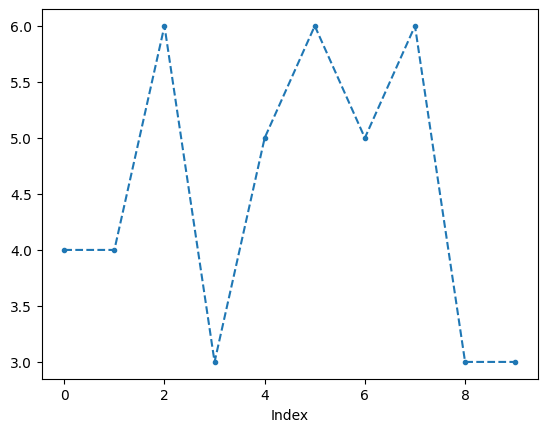

In [ ]:
results.plot()

In [ ]:
def cookie_count(x):
  count = 0
  for i in range(0,7):
    count += x[i]
  return count

cookies = results.apply(cookie_count).get(0)

print("The amount of cookies consumed in a week was {}.".format(cookies))

The amount of cookies consumed in a week was 33.


In [ ]:
results = X[5].sim(10000)
results.tabulate(normalize = True)

0,0.1128
1,0.0824
2,0.0429
3,0.1186
4,0.1284
5,0.1602
6,0.1195
7,0.0729
8,0.1164
9,0.0459
Total,1.0


###2.

Over many different weeks, what is the distribution of oreos he consumes?

In [ ]:
def compute_stationary_distribution(P):
    s = P.shape[0]
    identity_matrix = np.eye(s)
    ones_matrix = np.ones((s, s))

    # Compute the stationary distribution
    stationary_distribution = np.dot(np.ones(s), np.linalg.solve(identity_matrix - P + ones_matrix, np.eye(s)))

    return stationary_distribution

In [ ]:
stat_dist = compute_stationary_distribution(P)
stat_dist = stat_dist.round(3)
pi_sd = pd.DataFrame(stat_dist).T
pi_sd.index = ["pi"]
print("Nathan's stationary Distribution is:")
pi_sd

Nathan's stationary Distribution is:


,0,1,2,3,4,5,6,7,8,9
pi,0.113,0.083,0.046,0.116,0.129,0.156,0.118,0.078,0.119,0.043


###3.

Nathan loves all kinds of desserts and he thinks it is time for a switch up. The pack of oreos he just bought is down to its last 9 cookies. Use the stationary distribution to create an appropriate transition matrix to see how long will it take him to finish the pack and be ready for a new dessert?

In [ ]:
#get weighted rows for new transition matrix and fill in below
stat_dist
size = 1
tot = stat_dist[:size].sum()
new_prob = stat_dist[:size]/tot
print(sum(new_prob))
new_prob[::-1].round(2)

1.0


array([1.])

In [ ]:
#create transition matrix
#this transition matrix is now a count down of cookies to finishing the pack
P = np.array([
[1.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00],
[0.42 , 0.58 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00],
[0.19 , 0.34 , 0.47 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00],
[0.32 , 0.13 , 0.23 , 0.32 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00],
[0.26 , 0.24 , 0.09 , 0.17 , 0.23 , 0.00 , 0.00 , 0.00 , 0.00 , 0.00],
[0.24 , 0.20 , 0.18 , 0.07 , 0.13 , 0.18 , 0.00 , 0.00 , 0.00 , 0.00],
[0.16 , 0.20 , 0.17 , 0.15 , 0.06 , 0.11 , 0.15 , 0.00 , 0.00 , 0.00],
[0.09 , 0.14 , 0.19 , 0.15 , 0.14 , 0.05 , 0.10 , 0.13 , 0.00 , 0.00],
[0.12 , 0.08 , 0.12 , 0.16 , 0.13 , 0.12 , 0.05 , 0.09 , 0.12 , 0.00],
[0.04 , 0.12 , 0.08 , 0.12 , 0.16 , 0.13 , 0.12 , 0.05 , 0.08 , 0.11]])

In [ ]:
#set up transient, Identity and ones matrix
qstart = 1
qstop = 10
qsize = qstop - qstart
Q = P[qstart:qstop, qstart:qstop]
I = np.eye(qsize)
mat_ones = np.ones((qsize,1))

#solve
I_Q = I-Q
inv_IQ = np.linalg.inv(I_Q)

mu = np.dot(inv_IQ, mat_ones)

#result
print("mean time to finish the pack of oreos is", round(mu[8][0]), "days")

mean time to finish the pack of oreos is 4 days
